In [2]:
from pymatgen.ext.matproj import MPRester
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import BSPlotter
with MPRester("uI8z9nwQlS8xKKpAxb") as m:
    bandstructure = m.get_bandstructure_by_material_id("mp-10378")
    

In [3]:
band_gap = bandstructure.get_band_gap()
if (band_gap['direct'] == True):
    band = "directe"
else:
    band = "indirecte"
print("La bande interdite", band, "de", band_gap['energy'],"eV, quand le vecteur d'onde k évolue dans la direction", band_gap['transition'], "de la zone de Brillouin du cristal")

La bande interdite indirecte de 0.6126 eV, quand le vecteur d'onde k évolue dans la direction X-\Gamma de la zone de Brillouin du cristal


[0.5333780458409473, 0.5068877299481775, 0.05051186158261117, 0.24708718957493933, 0.10052923305383556, 0.570137371042896, 0.05051186158261117, 0.5190093777613302, 0.5701373710428947, 0.7673593638758288]
0.7673593638758288
0.05051186158261117
La pente maximal dans la bande de valence vaut : 0.7673593638758288 cela correspond a une dispersion maximal dans la direction | - X.
Cette dispersion est représentée par la flèche rouge.
 
La pente minimal dans la bande de valence vaut : 0.05051186158261117 cela correspond a une dispersion minimal dans la direction W - K.
Cette dispersion est représentée par la flèche bleue.


La pente maximal dans la bande de conduction vaut : 2.913972999818614 cela correspond a une dispersion maximal dans la         direction Γ - L.
Cette dispersion est représentée par la flèche jaune.
 
La pente minimal dans la bande de conduction vaut : 0.10986329894218112 cela correspond a une dispersion minimal dans la         direction W - K.
Cette dispersion est représent

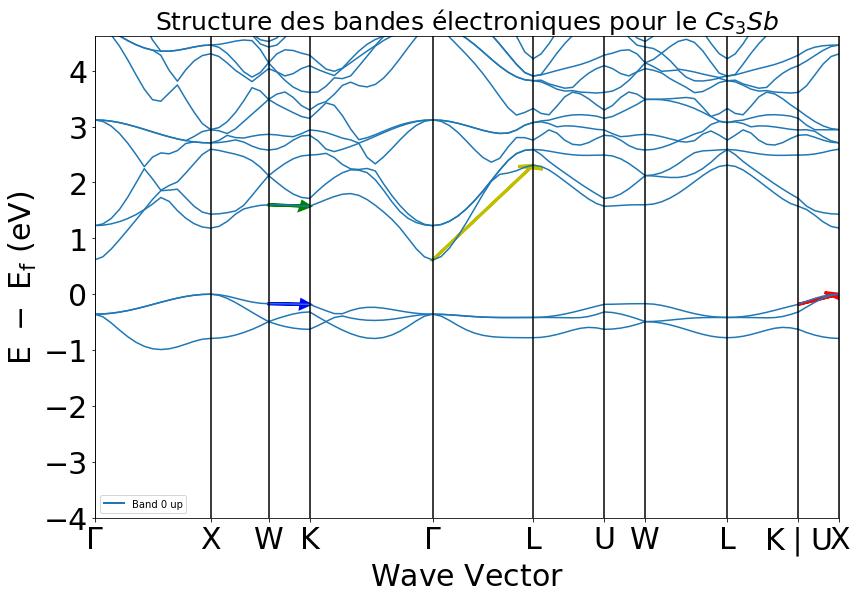

In [9]:
#Permet d'obtenir la dernière bande de valence et son max en énergie
vbm = bandstructure.get_vbm()
vbm_indice = 15 #Trouver avec print(vbm["band_index"])

#Pareil pour la première
cbm = bandstructure.get_cbm()
cbm_indice = 16 #Trouver avec print(cbm["band_index"])

plotter = BSPlotter(bandstructure)
kpoints, energies, labels = plotter.bs_plot_data()["distances"], plotter.bs_plot_data()["energy"], plotter.bs_plot_data()["ticks"]
pl = plotter.get_plot()
vbm_slopes = []
cbm_slopes = []

distance = []
for i in range(len(labels.get('distance'))):
    if (labels.get('distance')[i] not in distance) :
        distance.append(labels.get('distance')[i])

for i in range(len(distance)-1):
    delta = distance[1+i]-distance[i]
    vbm_slopes.append(abs(((energies['1'][i][vbm_indice])[-1] - (energies['1'][i][vbm_indice])[0])/delta))
    cbm_slopes.append(abs(((energies['1'][i][cbm_indice])[-1] - (energies['1'][i][cbm_indice])[0])/delta))
    
max_vbm_slope = np.amax(vbm_slopes)
min_vbm_slope = np.amin(vbm_slopes)
max_cbm_slope = np.amax(cbm_slopes)
min_cbm_slope = np.amin(cbm_slopes)


max_vbm_slope_indice = np.argmax(vbm_slopes)
min_vbm_slope_indice = np.argmin(vbm_slopes)
max_cbm_slope_indice = np.argmax(cbm_slopes)
min_cbm_slope_indice = np.argmin(cbm_slopes)

print("La pente maximal dans la bande de valence vaut :", max_vbm_slope,
      "cela correspond a une dispersion maximal dans la direction | - X.")
print("Cette dispersion est représentée par la flèche rouge.")
print(" ")
print("La pente minimal dans la bande de valence vaut :", min_vbm_slope,
      "cela correspond a une dispersion minimal dans la direction W - K.")
print("Cette dispersion est représentée par la flèche bleue.")
print("\n")
print("La pente maximal dans la bande de conduction vaut :", max_cbm_slope,
      "cela correspond a une dispersion maximal dans la", "        direction \u0393 - L.")
print("Cette dispersion est représentée par la flèche jaune.")
print(" ")
print("La pente minimal dans la bande de conduction vaut :", min_cbm_slope,
      "cela correspond a une dispersion minimal dans la         direction W - K.")
print("Cette dispersion est représentée par la flèche verte.")
print("\n")
plt.arrow(distance[max_vbm_slope_indice], (energies['1'][max_vbm_slope_indice][vbm_indice])[0],
          distance[max_vbm_slope_indice+1]-distance[max_vbm_slope_indice],
          (energies['1'][max_vbm_slope_indice][vbm_indice])[-1] - (energies['1'][max_vbm_slope_indice][vbm_indice])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(distance[min_vbm_slope_indice], (energies['1'][min_vbm_slope_indice][vbm_indice])[0],
          distance[min_vbm_slope_indice+1]-distance[min_vbm_slope_indice],
          (energies['1'][min_vbm_slope_indice][vbm_indice])[-1] - (energies['1'][min_vbm_slope_indice][vbm_indice])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(distance[max_cbm_slope_indice], (energies['1'][max_cbm_slope_indice][cbm_indice])[0],
          distance[max_cbm_slope_indice+1]-distance[max_cbm_slope_indice],
          (energies['1'][max_cbm_slope_indice][cbm_indice])[-1] - (energies['1'][max_cbm_slope_indice][cbm_indice])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)
plt.arrow(distance[min_cbm_slope_indice], (energies['1'][min_cbm_slope_indice][cbm_indice])[0],
          distance[min_cbm_slope_indice+1]-distance[min_cbm_slope_indice],
          (energies['1'][min_cbm_slope_indice][cbm_indice])[-1] - (energies['1'][min_cbm_slope_indice][cbm_indice])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.title("Structure des bandes électroniques pour le $Cs_3Sb$", fontsize = 25)
plt.show()

Comme nous supposons une dispersion parabolique la formule de la masse effective est : 
<h1><center>$m^* = \frac{\hbar^2k^2}{2 . E(k)}$</center></h1>

Avec $E(k)$ l'énergie d'une électron de vecteur d'onde $k$ dans la bande considérée. 

$\hbar = \frac{h}{2\pi}$ avec $h$ la constante de Planck.

In [57]:
kpoint_v = vbm.get('kpoint').frac_coords
kpoint_c = cbm.get('kpoint').frac_coords

energy_vbm = vbm.get('energy')
energy_cbm = cbm.get('energy')

norme_kpoint_v = np.linalg.norm(kpoint_v)
norme_kpoint_c = np.linalg.norm(kpoint_c)

print("Pour la bande de valence, la norme vaut :",norme_kpoint_v)
print(' ')
print("Pour la bande de conduction, la norme vaut :",norme_kpoint_c)

Pour la bande de valence, la norme vaut : 0.7071067811865476
 
Pour la bande de conduction, la norme vaut : 0.0


In [63]:
hbar = 6.5821e-16
m_e = 9.11e-31

masse_v = (hbar**2 * norme_kpoint_v**2)/(2*abs(energy_vbm))
masse_c = (hbar**2 * norme_kpoint_c**2)/(2*abs(energy_cbm))
print("La masse effective dans la bande de valence vaut :", masse_v, "kg")
print(" ")
print("La masse effective dans la bande de conduction vaut :", masse_c, "kg")

La masse effective dans la bande de valence vaut : 4.390356750101338e-32 kg
 
La masse effective dans la bande de conduction vaut : 0.0 kg


On remarque dans notre cas que notre masse effective est nulle dans la bande de conduction, cela est du a la norme de notre vecteur d'onde qui est nul ici. Pour avoir la valeur de la masse effective dans notre cas il faudrait utiliser des approximations plus sophistiquées. Et donc, de ne pas utiliser l'hypothèse de dispersion parabolique. 